***
# 3.1 First Order Syntax for Bird 5
### JX, 08/07/2022
***
    Bird5:
    LS110131.10.9.2015GeoPool.aiff
    LS110136.10.10.2015GeoGreens.aiff
    LS110143.10.12.2015GeoGreens.aiff
    LS110146A.10.13.2015GeoGreens.aiff
    
***

In [1]:
indv = 'Bird5'

In [2]:
## Load up Note Dataframe

import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

SAVE_LOC = 'interim/fine_labels/butcherbird_note_df_'+indv+'_fine.pickle'
SAVE_LOC = DATA_DIR / SAVE_LOC

note_df = pd.read_pickle(SAVE_LOC)

note_df.head()

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,...,key,audio,rate,spectrogram,umap,hdbscan_labels,recur_labels,recur_labels_id,lasso_labels,seq_id
0,0,513.78,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4.8774133, 15.248685]",16,16|1|0|nan|nan|nan|nan|nan|nan,87,42,0
1,0,513.78,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[6.9320498, 10.134182]",13,13|1|0|1.0|0.0|1.0|0.0|nan|nan,45,52,0
2,0,513.78,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8.438871, 21.151648]",5,5|2|0|0.0|nan|nan|nan|nan|nan,143,3,0
3,0,513.78,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[19.637224, -5.1326833]",7,7|0|1|0.0|nan|nan|nan|nan|nan,151,20,0
4,0,513.78,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,...,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[9.055997, -1.52321]",12,12|1|0|nan|nan|nan|nan|nan|nan,38,14,0


## Feed parameters into analysis package

In [3]:
onsets = note_df['note_strt']
syntactic_units = note_df['lasso_labels']
expected_interval_range = [0, 1]
dataset_description = 'Songbird: Pied Butcherbirds'

## Find Consistent Transitions

In [4]:
from butcherbird import sequential

In [5]:
import numpy as np

In [6]:
trans_mat = sequential.construct_seq_matrix(note_df, label = 'lasso_labels', sort = False)

In [7]:
## bootstrap null distributions with 100 samples under 0-order syntax assumption

In [8]:
p_container = []

## sample 100 times
for i in np.arange(0, 100):
    
    ## bootstrap one zero-order sequence
    bootstrapped_df = note_df.sample(n = len(note_df), replace = True).reset_index()
    
    ## find the transition matrix of the sequence
    bootstrapped_mat = sequential.construct_seq_matrix(bootstrapped_df, label = 'lasso_labels', sort = False)
    
    ## turn the matrix into long form
    bootstrapped_long = sequential.long_cvtr(bootstrapped_mat, songType = 'Bootstrapped')
    
    ## return bootstrapped distribution of all transition probabilities
    p_container.append(bootstrapped_long.p.values)
    
#p_container

In [9]:
## swap axes so that each element in p_container is a null sampling distribution of 
## find how likely that specific transition happpens with just 0 order syntax

In [10]:
p = np.swapaxes(p_container, 0, 1)

In [11]:
p

array([[0.01357466, 0.00966184, 0.00502513, ..., 0.00934579, 0.01415094,
        0.01904762],
       [0.        , 0.00966184, 0.01005025, ..., 0.0046729 , 0.00471698,
        0.01904762],
       [0.00452489, 0.00966184, 0.01005025, ..., 0.        , 0.00471698,
        0.0047619 ],
       ...,
       [0.01639344, 0.        , 0.02222222, ..., 0.        , 0.        ,
        0.02083333],
       [0.        , 0.        , 0.        , ..., 0.07407407, 0.        ,
        0.02083333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
import numpy as np
import scipy.stats

## a standard calculation for confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [13]:
higherconfints = []

for null_transitions in p:
    higherconfints.append(mean_confidence_interval(null_transitions, confidence = 0.95)[2])
    
#higherconfints

In [14]:
trans_long = sequential.long_cvtr(trans_mat, songType = 'True')

In [15]:
trans_long

,songType,noteType,markov,p
0,True,0,0,0.004717
1,True,0,1,0.000000
2,True,0,2,0.000000
3,True,0,3,0.000000
4,True,0,4,0.080189
...,...,...,...,...
4220,True,64,60,0.000000
4221,True,64,61,0.000000
4222,True,64,62,0.000000
4223,True,64,63,0.000000


In [16]:
trans_long['higherconfint'] = higherconfints

In [17]:
trans_long

,songType,noteType,markov,p,higherconfint
0,True,0,0,0.004717,0.014471
1,True,0,1,0.000000,0.007112
2,True,0,2,0.000000,0.005174
3,True,0,3,0.000000,0.016078
4,True,0,4,0.080189,0.043294
...,...,...,...,...,...
4220,True,64,60,0.000000,0.006915
4221,True,64,61,0.000000,0.018499
4222,True,64,62,0.000000,0.012953
4223,True,64,63,0.000000,0.010642


In [18]:
filtered_trans_long = trans_long[trans_long.p > trans_long.higherconfint]

In [19]:
filtered_trans_long

,songType,noteType,markov,p,higherconfint
4,True,0,4,0.080189,0.043294
18,True,0,18,0.179245,0.015513
25,True,0,25,0.009434,0.005647
33,True,0,33,0.396226,0.007130
39,True,0,39,0.080189,0.022855
...,...,...,...,...,...
4179,True,64,19,0.157895,0.020494
4188,True,64,28,0.026316,0.006831
4194,True,64,34,0.026316,0.025473
4197,True,64,37,0.105263,0.050945


In [20]:
ftl = filtered_trans_long

## Rhythm Dyadic Analysis

In [21]:
## load rhythm analyzer
import butcherbird.rhythm as rhythm

/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/rhythm.py:151: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [22]:
dyadic = rhythm.construct_rhythm_df(
    onsets = onsets, 
    syntactic_units = syntactic_units, 
    expected_interval_range = expected_interval_range)

In [23]:
dyadic

,intervals1,intervals2,label1,label2,label3,s_interval,l_interval,cycle_dur,ratio_roeske,ratio_custom,cycle_rank
6572,0.036773,0.003309,8,35,17,0.003309,0.036773,0.040083,0.917441,0.089989,1
1010,0.034970,0.005312,56,35,47,0.005312,0.034970,0.040282,0.868121,0.151913,2
72,0.039629,0.001440,8,35,6,0.001440,0.039629,0.041068,0.964946,0.036327,3
12132,0.045232,0.011358,62,63,19,0.011358,0.045232,0.056590,0.799288,0.251113,4
6555,0.022714,0.034077,49,49,37,0.022714,0.034077,0.056791,0.399952,0.666534,5
...,...,...,...,...,...,...,...,...,...,...,...
12402,0.411473,0.858550,38,21,30,0.411473,0.858550,1.270023,0.323989,0.479265,13789
3,0.734433,0.537019,20,14,8,0.537019,0.734433,1.271452,0.577633,0.731202,13790
8044,0.460000,0.820000,38,21,30,0.460000,0.820000,1.280000,0.359375,0.560976,13791
8144,0.440000,0.875788,38,21,30,0.440000,0.875788,1.315788,0.334400,0.502405,13792


In [24]:
ftl

,songType,noteType,markov,p,higherconfint
4,True,0,4,0.080189,0.043294
18,True,0,18,0.179245,0.015513
25,True,0,25,0.009434,0.005647
33,True,0,33,0.396226,0.007130
39,True,0,39,0.080189,0.022855
...,...,...,...,...,...
4179,True,64,19,0.157895,0.020494
4188,True,64,28,0.026316,0.006831
4194,True,64,34,0.026316,0.025473
4197,True,64,37,0.105263,0.050945


In [25]:
## verify rhythm counts above 0.01 of total rhythm count (8013 * 0.01)

In [26]:
verified = []

for index, transition in ftl.iterrows():
    note = transition.noteType
    dest = transition.markov
    
    ## find if dyadic contains enough entries for this particular combination
    first_filter = dyadic[dyadic.label1 == note]
    second_filter = first_filter[first_filter.label2 == dest]
    
    if len(second_filter) > 0.01*len(dyadic):
        verified.append(index)

In [27]:
vr = ftl.filter(items = verified, axis = 0)

In [28]:
unique, counts = np.unique(vr.noteType, return_counts = True)

In [29]:
eligible_notes = []
for noteType, count in zip(unique, counts):
    if count > 1:
        eligible_notes.append(noteType)

In [30]:
eligible_transitions = []

for n in eligible_notes:
    eligible_transitions.append(vr[vr.noteType == n])
    
eligible_transitions = pd.concat(eligible_transitions)

In [31]:
eligible_transitions

,songType,noteType,markov,p,higherconfint
1544,True,23,49,0.282178,0.047452
1554,True,23,59,0.277228,0.047519
3219,True,49,34,0.403846,0.020830
3236,True,49,51,0.302564,0.015267
3383,True,52,3,0.355886,0.016874
3417,True,52,37,0.320704,0.044371
3813,True,58,43,0.191358,0.026079
3816,True,58,46,0.275463,0.024987


In [32]:
import scipy.stats
import itertools

def bif_rhythm_ks(vd_bif, dyadic, mode = 'ratio_roeske'):
    '''
    Calculate KS test for each bifurcation point
    '''
    
    output = []
    
    # 1. Extract Bifurcation Info from vd_bif
    ### a. Find all pre-bifurcation notes
    pre_bif = np.unique(vd_bif['noteType'])
    
    # 2. For each bifurcation, conduct a Kolmogorov-Smirnov test
    ### a. for each bifurcation
    for note in pre_bif:
        ### a. Query its exact slice
        bif_df = vd_bif[vd_bif['noteType'] == note]
        ### b. Query its bifurcation destinations
        destinations = np.unique(bif_df['markov'])
        pairs = list(itertools.combinations(destinations, 2))
        ### c. Filter dyadic by pre_bif
        note_df = dyadic[dyadic['label1'] == note]
        ### d. Filter note_df by bif destinations
        for pair in pairs: 
            t1_df = note_df[note_df['label2'] == pair[0]]
            t2_df = note_df[note_df['label2'] == pair[1]]
            bif_prob0 = bif_df[bif_df['markov'] == pair[0]]['p'].values[0]
            bif_prob1 = bif_df[bif_df['markov'] == pair[1]]['p'].values[0]
            
            ### e. compute ks
            try:
                ks = scipy.stats.ks_2samp(t1_df[mode], t2_df[mode])
            except:
                ks = [None, None]
                print('ks not computed')
            ### e. feeds out pandas
            output.append(
                pd.DataFrame(
                    {
                        'pre_bif': [note],
                        'bif_des': [(pair[0], pair[1])],
                        'bif_prof': [
                            (
                                bif_prob0,
                                bif_prob1
                            )
                        ],
                        'rhy_cnts': [
                            (
                                len(t1_df),
                                len(t2_df)
                            )
                        ],
                        'ks_statistic': [ks[0]],
                        'ks_p': [ks[1]]
                    }
                )
            )
        
        print('Finished querying bifurcation with pre_bif ', note)
    return pd.concat(output)

In [33]:
entangle = bif_rhythm_ks(eligible_transitions, dyadic)

Finished querying bifurcation with pre_bif  23
Finished querying bifurcation with pre_bif  49
Finished querying bifurcation with pre_bif  52
Finished querying bifurcation with pre_bif  58


In [34]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,23,"(49, 59)","(0.28217821782178215, 0.27722772277227725)","(228, 223)",0.995516,4.246959e-132
0,49,"(34, 51)","(0.40384615384615385, 0.30256410256410254)","(291, 236)",0.355277,3.887631e-15
0,52,"(3, 37)","(0.35588633288227334, 0.32070365358592695)","(257, 225)",0.332538,2.906334e-12
0,58,"(43, 46)","(0.19135802469135801, 0.27546296296296297)","(248, 355)",0.241470,5.660606e-08


In [35]:
entangle['ks_p'] < 0.001

0    True
0    True
0    True
0    True
Name: ks_p, dtype: bool

In [36]:
## bonferroni correct

In [37]:
import statsmodels.stats.multitest

In [38]:
entangle['bonferroni_p'] = statsmodels.stats.multitest.multipletests(entangle['ks_p'].values, alpha = 0.05, method = 'bonferroni')[1]

In [39]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p,bonferroni_p
0,23,"(49, 59)","(0.28217821782178215, 0.27722772277227725)","(228, 223)",0.995516,4.246959e-132,1.698783e-131
0,49,"(34, 51)","(0.40384615384615385, 0.30256410256410254)","(291, 236)",0.355277,3.887631e-15,1.555052e-14
0,52,"(3, 37)","(0.35588633288227334, 0.32070365358592695)","(257, 225)",0.332538,2.906334e-12,1.162534e-11
0,58,"(43, 46)","(0.19135802469135801, 0.27546296296296297)","(248, 355)",0.241470,5.660606e-08,2.264242e-07


In [40]:
entangle['bonferroni_p'] < 0.001

0    True
0    True
0    True
0    True
Name: bonferroni_p, dtype: bool

In [41]:
## do a shuffle
dyadic_shuffle = dyadic.copy(deep = True)
np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
entangle_shuffled = bif_rhythm_ks(eligible_transitions, dyadic_shuffle)

Finished querying bifurcation with pre_bif  23
Finished querying bifurcation with pre_bif  49
Finished querying bifurcation with pre_bif  52
Finished querying bifurcation with pre_bif  58


In [42]:
entangle_shuffled

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p
0,23,"(49, 59)","(0.28217821782178215, 0.27722772277227725)","(228, 223)",0.081622,0.409301
0,49,"(34, 51)","(0.40384615384615385, 0.30256410256410254)","(291, 236)",0.055929,0.781451
0,52,"(3, 37)","(0.35588633288227334, 0.32070365358592695)","(257, 225)",0.112028,0.088880
0,58,"(43, 46)","(0.19135802469135801, 0.27546296296296297)","(248, 355)",0.037358,0.980674


# Compute Global Statistic

The concept of the global statistic here is to compare the rhythm ratios for each first-order syntax and to compare between-group variation / within-group variation. 

1. Find each first-order transition -> z-score -> compile all first-order transition -> MSE
2. Compare with zero-order transition -> z-score -> compile all first-order transition -> MSE
3. Is first-order transition variance is lower than zero-order transition variance?

## Let's find all the first-order transitions first

In [43]:
import scipy.stats as stats

In [44]:
def syntactic_rhythmic_modulation_metric (dyadic):
    
    ## compute global metric
    
    first_order_rhythms_centered = []
    first_order_group_n = 0

    ## for every possible label
    for label in np.unique(dyadic['label1']):

        ## find a sub dataframe containing only designated zero-order label
        zero_order = dyadic[dyadic['label1'] == label]

        ## for every possible transition of that label
        for transition in np.unique(zero_order['label2']):

            ## find its rhythms
            first_order = zero_order[zero_order['label2'] == transition]
            first_order_rhythms = first_order['ratio_roeske'].values
            first_order_rhythms_centered.extend(first_order_rhythms - np.mean(first_order_rhythms))

            ## add 1 to group_n
            first_order_group_n+=1
    
    # find MSE
    MSE_first = sum(np.square(first_order_rhythms_centered)) / len(dyadic)
    MSE_baseline = sum(np.square(dyadic['ratio_roeske'].values - np.mean(dyadic['ratio_roeske']))) / len(dyadic)
    
    return 1 - MSE_first / MSE_baseline

## empirical 

In [45]:
syntactic_rhythmic_modulation_metric(dyadic)

0.9571726256312874

## Find Baseline using bootstrap

In [46]:
from tqdm.autonotebook import tqdm

In [47]:
dyadic_shuffle = dyadic.copy(deep = True)

SDoMSE = []

for sample in tqdm(np.arange(0, 100)):
    
    ## shuffle dyadic
    np.random.shuffle(dyadic_shuffle['ratio_roeske'].values)
    
    SDoMSE.append(syntactic_rhythmic_modulation_metric(dyadic_shuffle))

  0%|          | 0/100 [00:00<?, ?it/s]

In [48]:
mean_confidence_interval(SDoMSE, confidence=0.95)

(0.0538850248612109, 0.05339470267203896, 0.054375347050382834)

## Output Graphs for every analyzed transition

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [50]:
entangle

,pre_bif,bif_des,bif_prof,rhy_cnts,ks_statistic,ks_p,bonferroni_p
0,23,"(49, 59)","(0.28217821782178215, 0.27722772277227725)","(228, 223)",0.995516,4.246959e-132,1.698783e-131
0,49,"(34, 51)","(0.40384615384615385, 0.30256410256410254)","(291, 236)",0.355277,3.887631e-15,1.555052e-14
0,52,"(3, 37)","(0.35588633288227334, 0.32070365358592695)","(257, 225)",0.332538,2.906334e-12,1.162534e-11
0,58,"(43, 46)","(0.19135802469135801, 0.27546296296296297)","(248, 355)",0.241470,5.660606e-08,2.264242e-07


In [51]:
note_types = entangle['pre_bif'].values
destinations = entangle['bif_des'].values

In [52]:
## shuffle dyadic
time_info = dyadic[['intervals1', 
                   'intervals2',
                   's_interval',
                   'l_interval',
                   'cycle_dur',
                   'ratio_roeske',
                   'ratio_custom',
                   'cycle_rank'
                  ]]

syntax_info = dyadic[['label1',
                      'label2',
                      'label3'
                  ]]

bootstrapped_time_info = time_info.sample(frac = 100, replace = True).reset_index(drop = True)
bootstrapped_syntax_info = syntax_info.sample(frac = 100, replace = True).reset_index(drop = True)
dyadic_shuffle = bootstrapped_time_info.join(bootstrapped_syntax_info)

/tmp/ipykernel_40286/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_40286/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


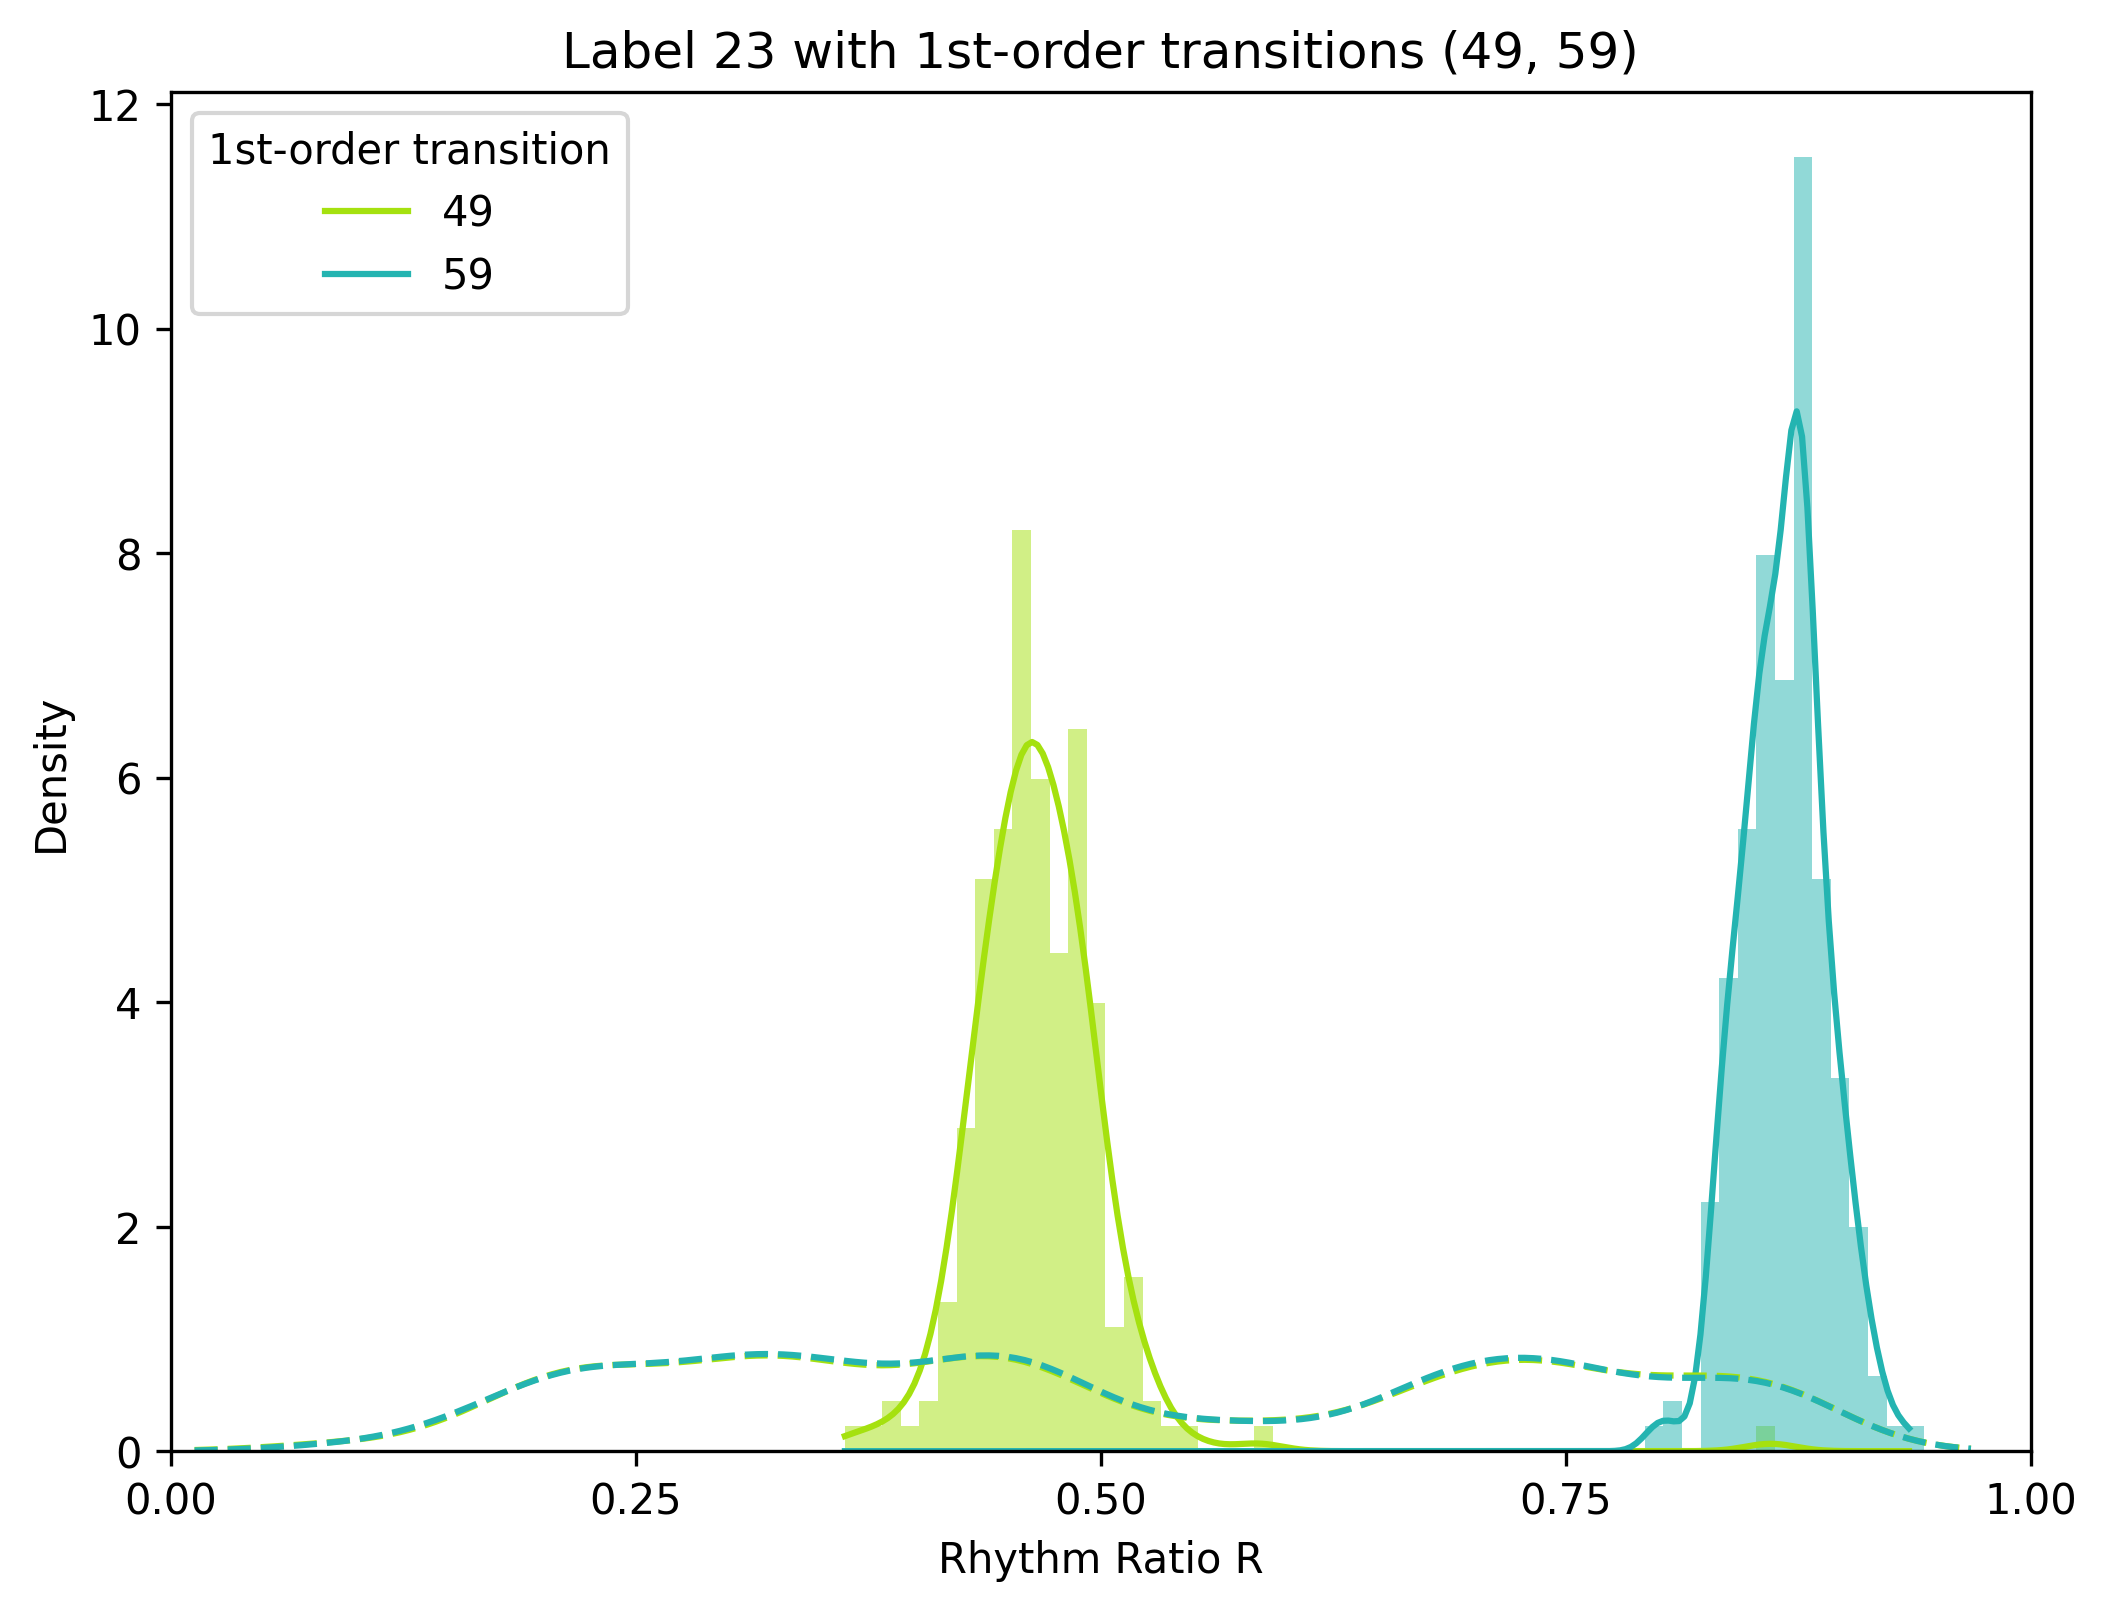

/tmp/ipykernel_40286/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_40286/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


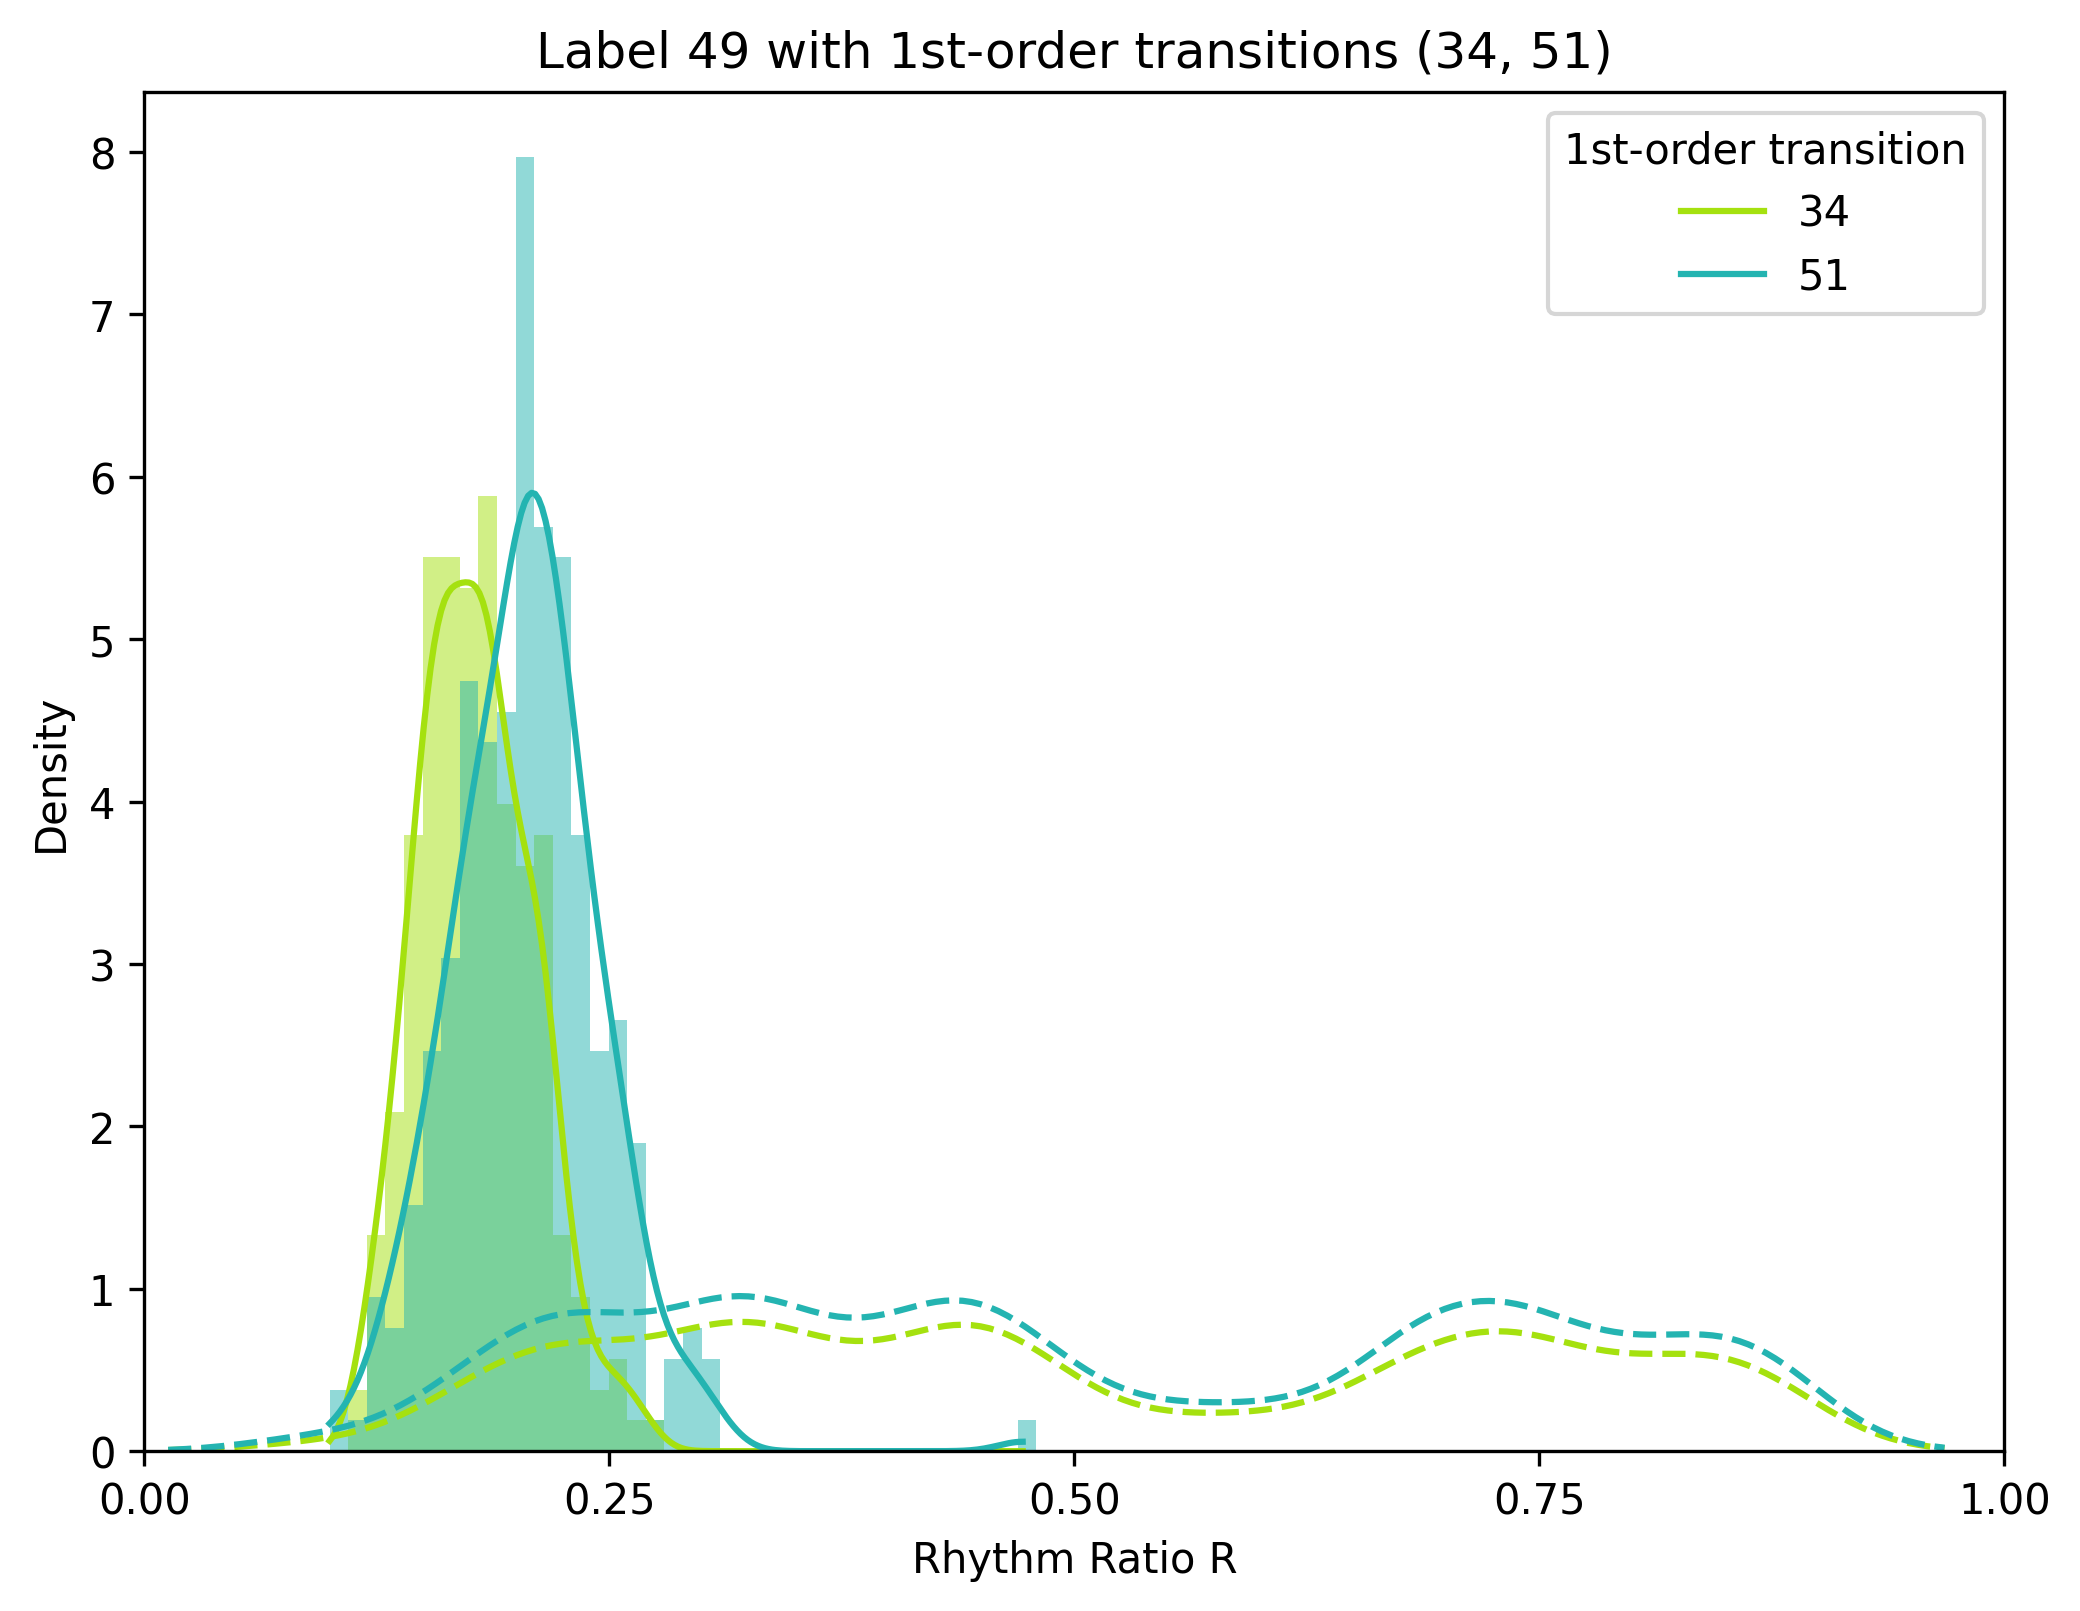

/tmp/ipykernel_40286/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_40286/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


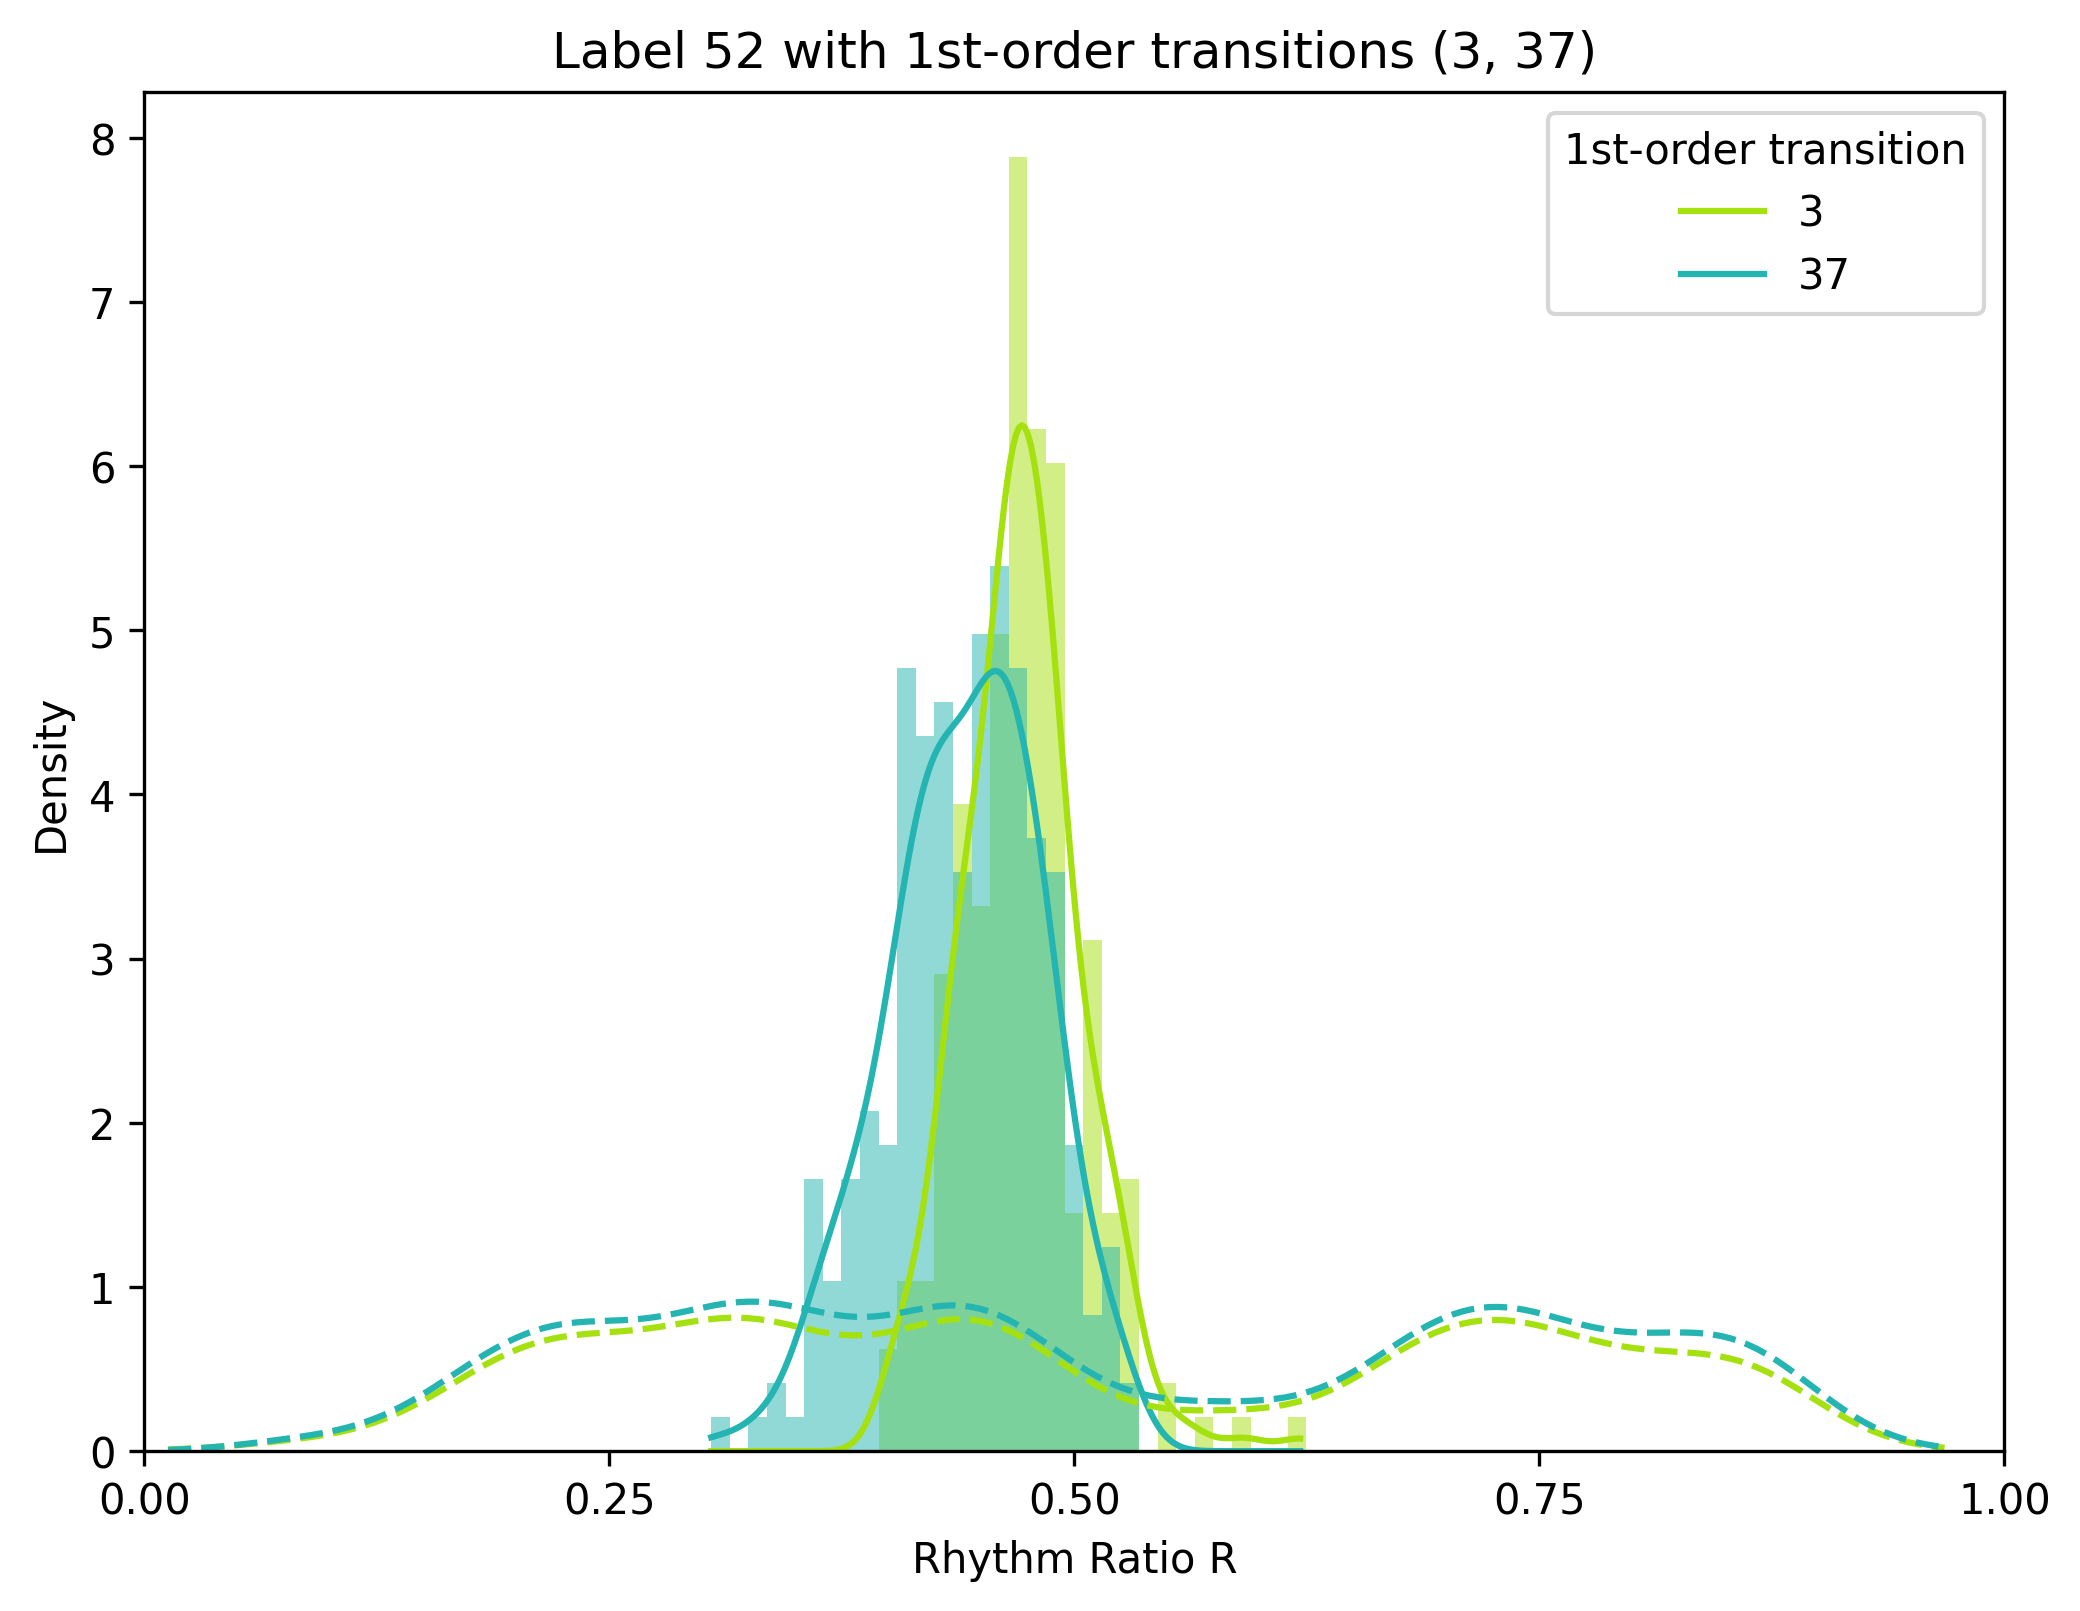

/tmp/ipykernel_40286/4236685669.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
/tmp/ipykernel_40286/4236685669.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])


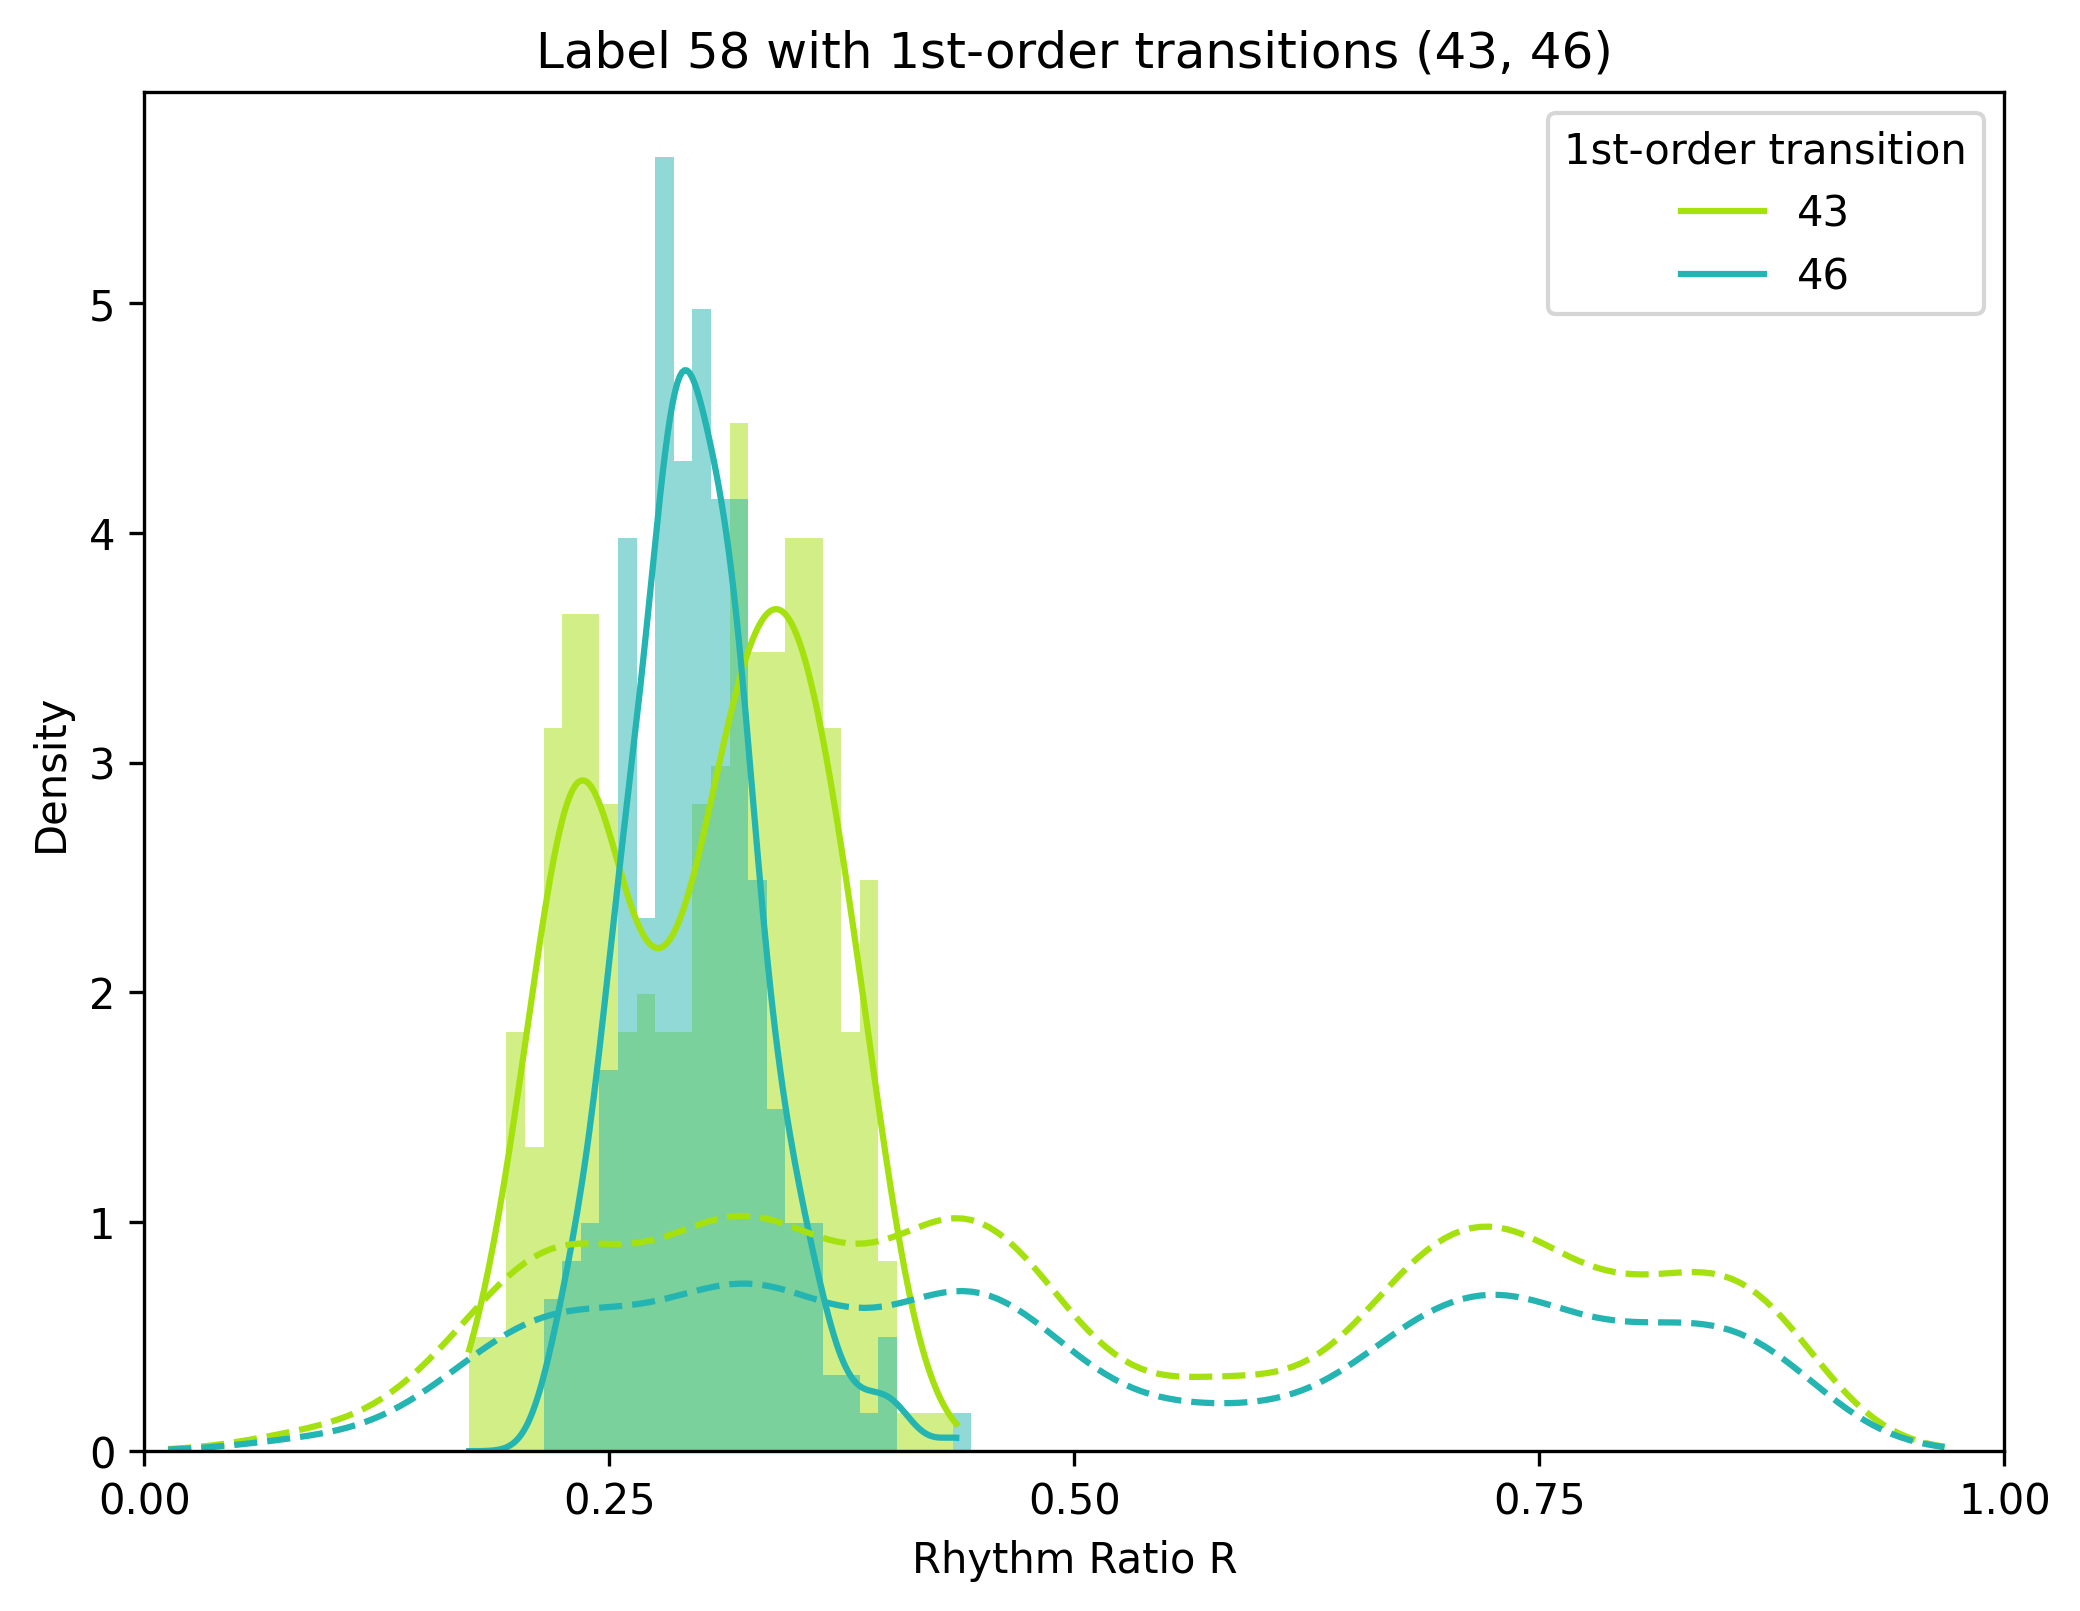

In [53]:
## for every note type and corresponding destinations
for note_type, destination in zip(note_types, destinations):
    ## filter zero-order and its shuffle
    pos1 = dyadic[dyadic['label1'] == note_type]
    pos1_shuffle = dyadic_shuffle[dyadic_shuffle['label1'] == note_type]
    ## filter first_order and its shuffle
    pos2 = pos1[pos1['label2'] == destination[0]].append(pos1[pos1['label2'] == destination[1]])
    pos2_shuffle = pos1_shuffle[pos1_shuffle['label2'] == destination[0]].append(pos1_shuffle[pos1_shuffle['label2'] == destination[1]])
    
    ## graph
    figure(figsize=(8, 6), dpi=300)
       
    x = pos2 
    
    # Create an array with the colors you want to use
    colors = ["#24B4B1", "#A5E10F"]
    # Set your custom color palette
    custom = sns.set_palette(sns.color_palette(colors))
    
    plt.rcParams['patch.edgecolor'] = 'none'
    
    plt.legend(title='1st-order transition', labels = np.unique(pos2['label2']))
    
    sns.histplot(
        data = x,
        binwidth = 0.01,
        x = 'ratio_roeske',
        hue = 'label2',
        kde = True,
        palette = sns.color_palette(colors),
        stat = 'density'
    ).set(title = 'Label ' + str(note_type) + ' with 1st-order transitions ' + str(destination), xlabel = 'Rhythm Ratio R')
    
    x_shuffle = pos2_shuffle
    
    sns.histplot(
        data = x_shuffle,
        binwidth = 0.01,
        x = 'ratio_roeske',
        hue = 'label2',
        kde = True,
        palette = sns.color_palette(colors),
        alpha = 0,
        stat = 'density',
        line_kws = dict(linestyle = 'dashed')
    )
    
    
    ax = plt.gca()
    ax.set_xlim([0, 1])
    plt.xticks(np.arange(0, 1.25, 0.25))
    
    plt.legend(title='1st-order transition', labels = np.unique(pos2['label2']))
    
    #ax.set_ylim([0, 100])
    
    from butcherbird.utils.paths import FIGURE_DIR
    
    figname = str(indv) + '_' + str(note_type) + '_' + str(destination) + ".pdf"
    
    plt.savefig(FIGURE_DIR/'first_order'/str(indv)/figname)
    plt.show()
    